In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,6)

# - Defining color palette and color maps:

In [233]:
colors = ["#157dd9", "#302c3e", "#f6f6f6"]
cmap = LinearSegmentedColormap.from_list('cmap', colors, N=22)


def sub_cmap(cmap, vmin, vmax):
    return lambda v: cmap(vmin + (vmax - vmin) * v)


cmap1 = sub_cmap(cmap, 0.5, 5)
cmap2 = sub_cmap(cmap, 5, 10)

# - Data description:

Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# - Importing and exploring data:

In [234]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [235]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [236]:
data=data.drop(["id"],axis=1)

In [237]:
hyperDic={1:'has hypertension',0:'has\'t hypertension'}
data['hypertension']=data.stroke.map(hyperDic)

heartDic={1:'has heart disease',0:'has\'t heart disease'}
data['heart_disease']=data.stroke.map(heartDic)

strokeDic={1:'has stroke',0:'has\'t stroke'}
data['stroke']=data.stroke.map(strokeDic)

bins = [0, 20, 40,  60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '80+']
data['agerange'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agerange
0,Male,67.0,has hypertension,has heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,has stroke,61-80
1,Female,61.0,has hypertension,has heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,has stroke,61-80
2,Male,80.0,has hypertension,has heart disease,Yes,Private,Rural,105.92,32.5,never smoked,has stroke,61-80
3,Female,49.0,has hypertension,has heart disease,Yes,Private,Urban,171.23,34.4,smokes,has stroke,41-60
4,Female,79.0,has hypertension,has heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,has stroke,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,has't hypertension,has't heart disease,Yes,Private,Urban,83.75,NaN,never smoked,has't stroke,61-80
5106,Female,81.0,has't hypertension,has't heart disease,Yes,Self-employed,Urban,125.20,40.0,never smoked,has't stroke,80+
5107,Female,35.0,has't hypertension,has't heart disease,Yes,Self-employed,Rural,82.99,30.6,never smoked,has't stroke,21-40
5108,Male,51.0,has't hypertension,has't heart disease,Yes,Private,Rural,166.29,25.6,formerly smoked,has't stroke,41-60


In [238]:
data['stroke'].value_counts()

has't stroke    4861
has stroke       249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'stroke')

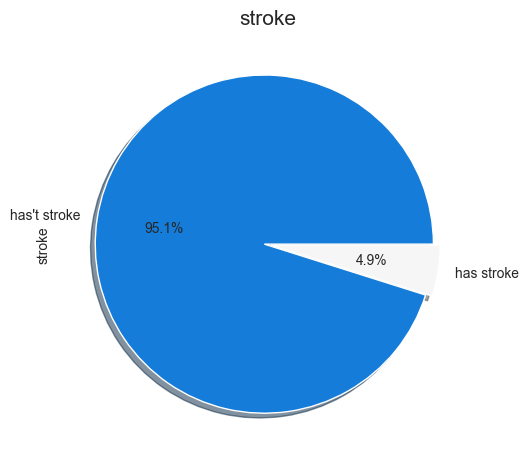

In [239]:
plt.subplot(1, 2, 2)
round(data['stroke'].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap=cmap, explode=[0.02,0.02],shadow=True)
plt.title('stroke', fontsize=15)


In [240]:
def visualize(c):
    x=[0.02 for i in range(len(list(data[c].unique())))]
    plt.subplot(1, 2, 1)
    plt.title(f'{c} and stroke', fontsize=15)
    sns.countplot(x=c,hue='stroke', data=data, palette=colors)

    plt.subplot(1, 2, 2)
    round(data[c].value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%1.1f%%',colormap=cmap, explode=x,shadow=True)
    plt.title(c, fontsize=15)

    plt.show()

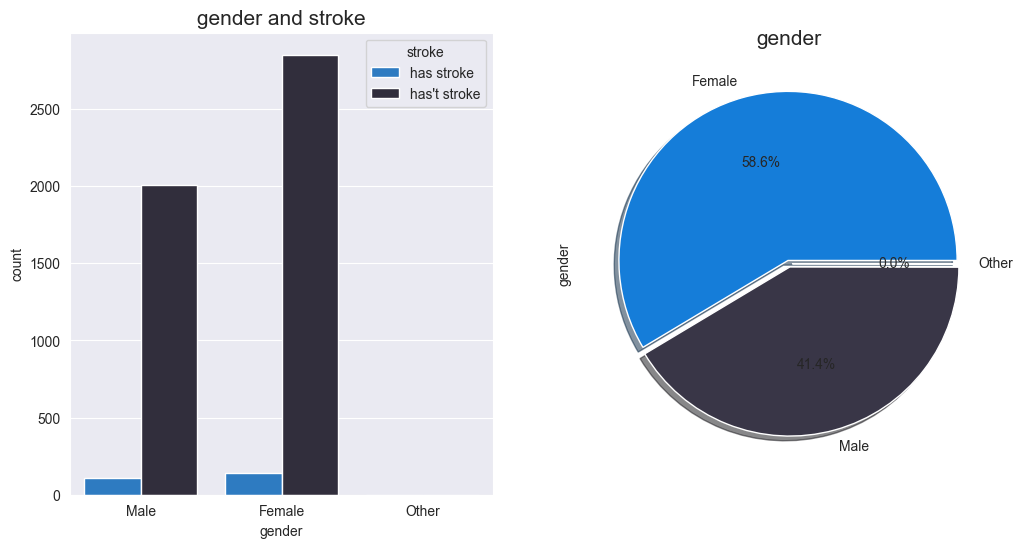

In [241]:
visualize('gender')

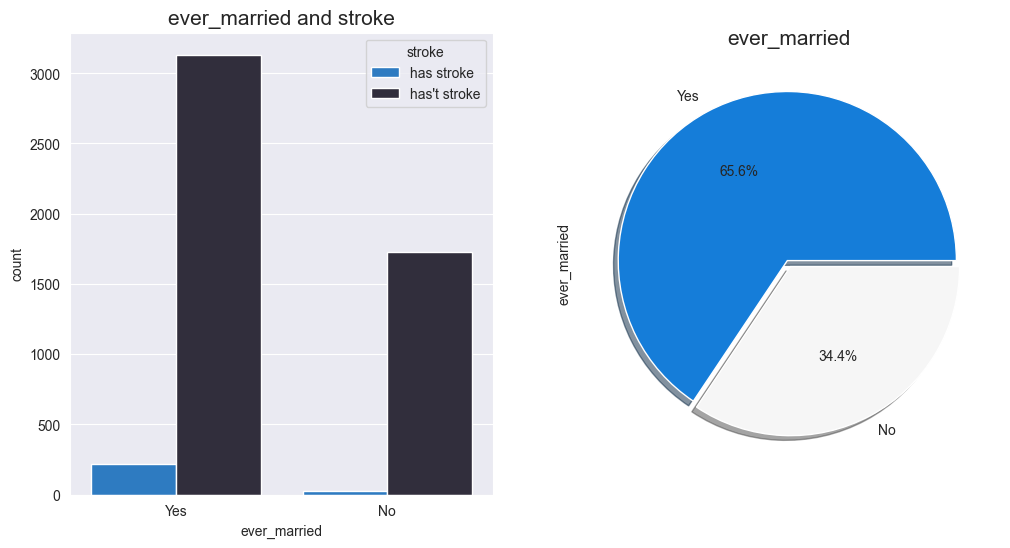

In [242]:
visualize('ever_married')

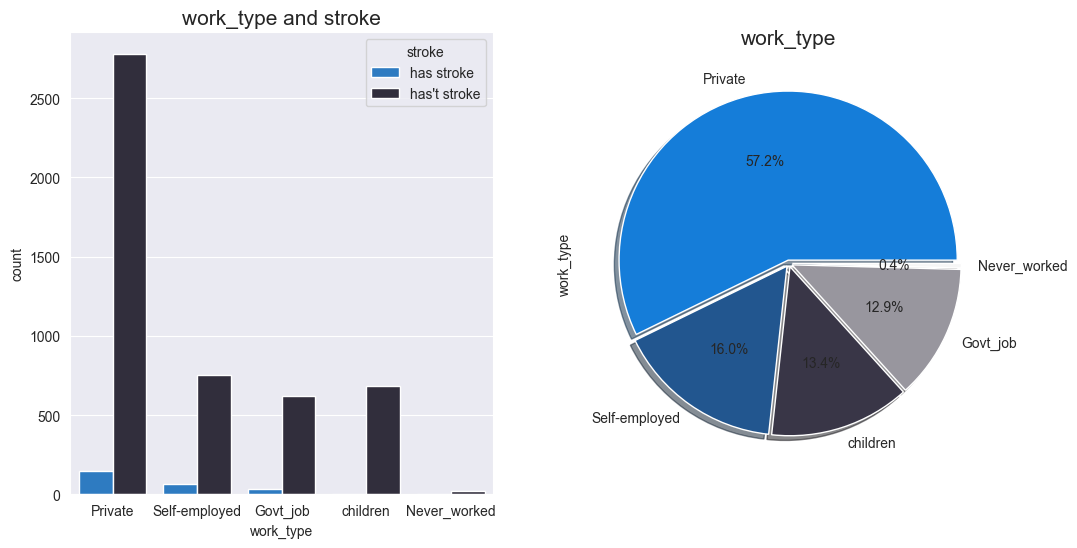

In [243]:
visualize('work_type')

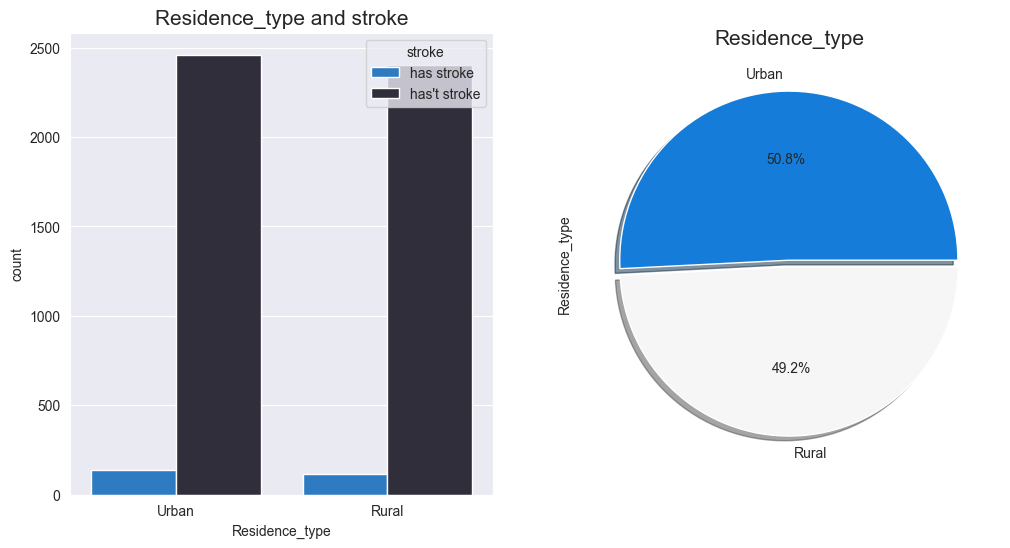

In [244]:
visualize('Residence_type')

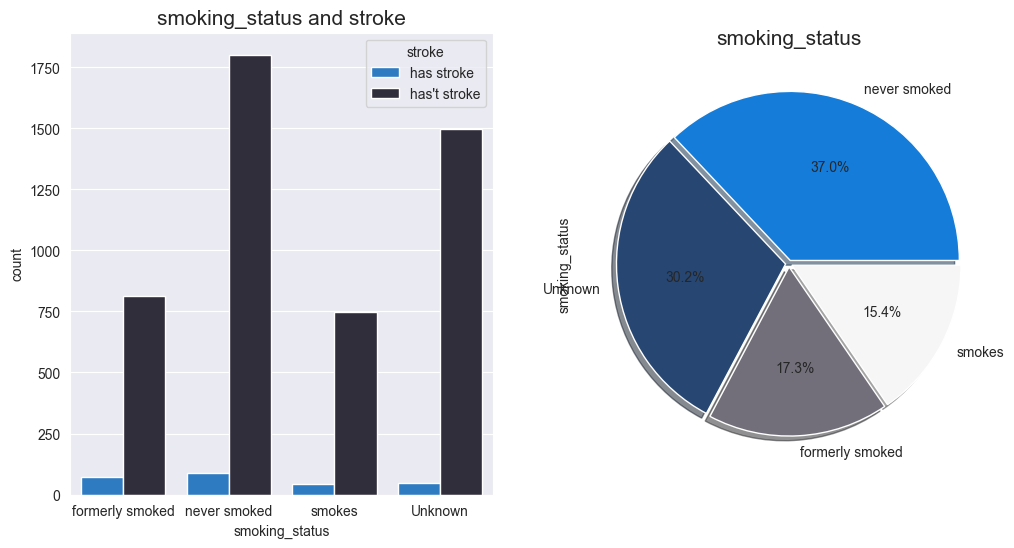

In [245]:
visualize("smoking_status")

In [246]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agerange
0,Male,67.0,has hypertension,has heart disease,Yes,Private,Urban,228.69,36.6,formerly smoked,has stroke,61-80
1,Female,61.0,has hypertension,has heart disease,Yes,Self-employed,Rural,202.21,NaN,never smoked,has stroke,61-80
2,Male,80.0,has hypertension,has heart disease,Yes,Private,Rural,105.92,32.5,never smoked,has stroke,61-80
3,Female,49.0,has hypertension,has heart disease,Yes,Private,Urban,171.23,34.4,smokes,has stroke,41-60
4,Female,79.0,has hypertension,has heart disease,Yes,Self-employed,Rural,174.12,24.0,never smoked,has stroke,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,has't hypertension,has't heart disease,Yes,Private,Urban,83.75,NaN,never smoked,has't stroke,61-80
5106,Female,81.0,has't hypertension,has't heart disease,Yes,Self-employed,Urban,125.20,40.0,never smoked,has't stroke,80+
5107,Female,35.0,has't hypertension,has't heart disease,Yes,Self-employed,Rural,82.99,30.6,never smoked,has't stroke,21-40
5108,Male,51.0,has't hypertension,has't heart disease,Yes,Private,Rural,166.29,25.6,formerly smoked,has't stroke,41-60


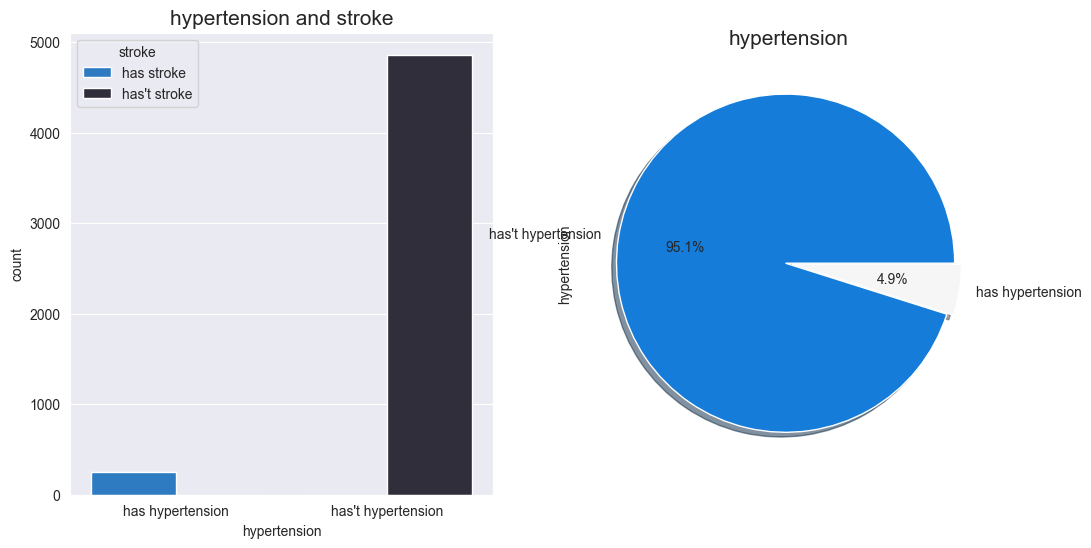

In [247]:
visualize("hypertension")

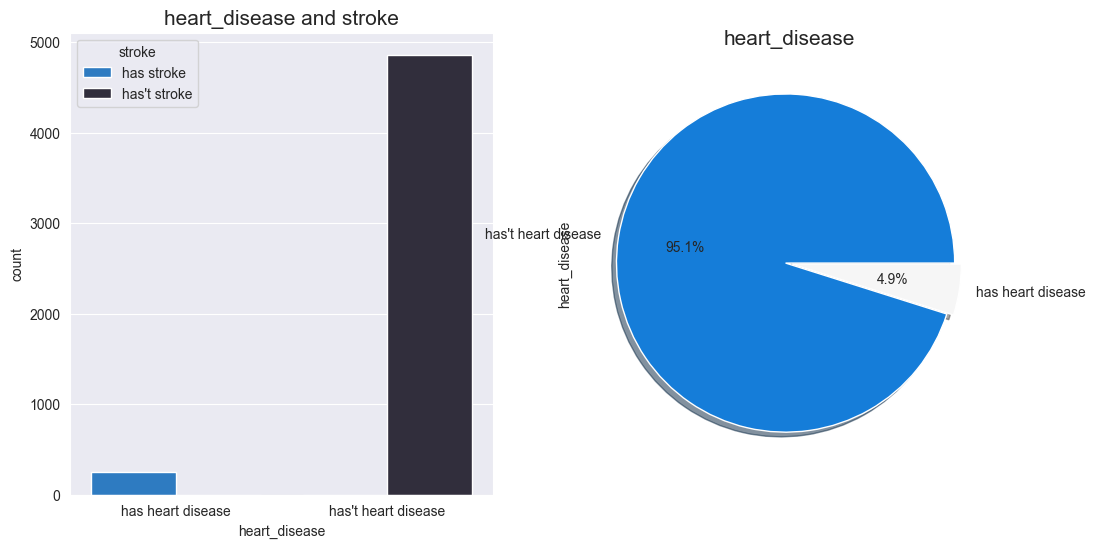

In [248]:
visualize("heart_disease")

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

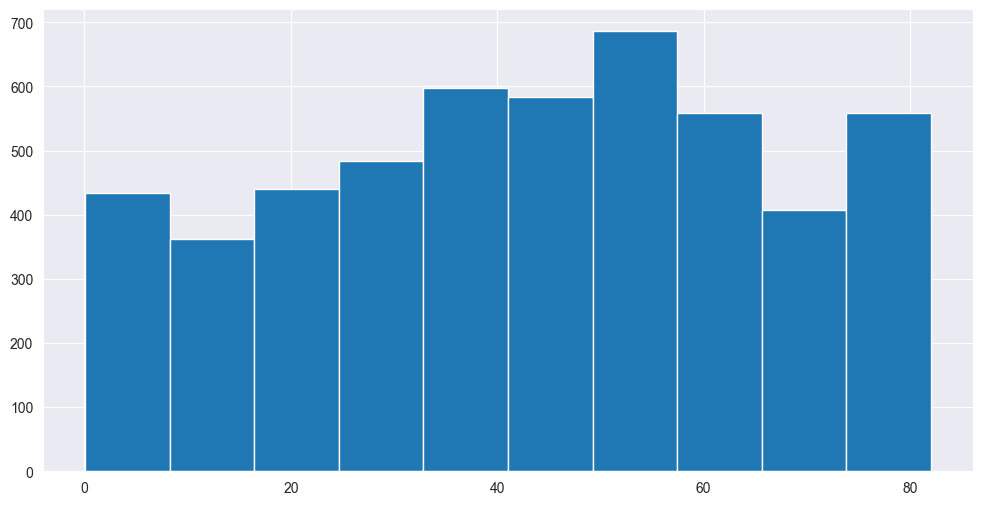

In [249]:
plt.hist(x=data['age'],bins=10)

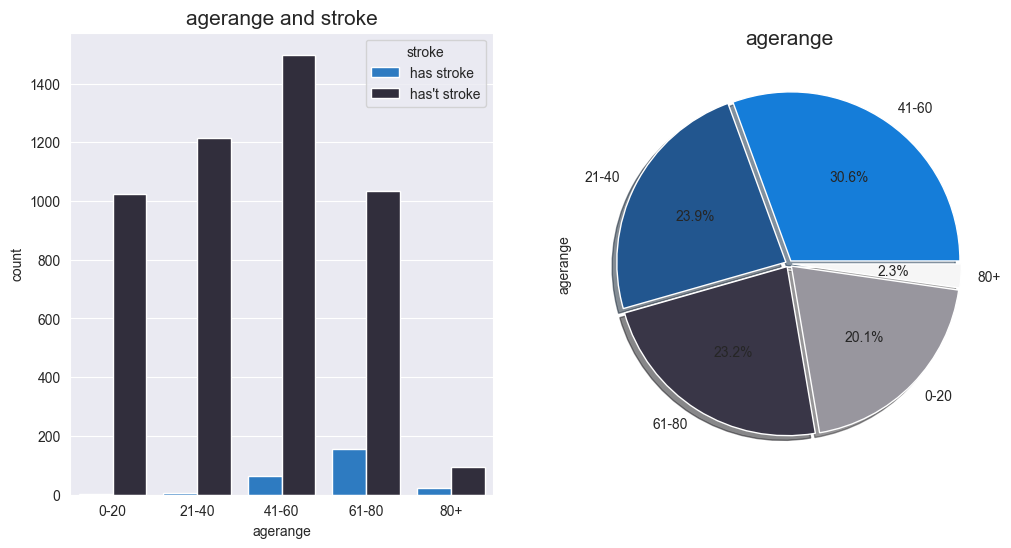

In [250]:
visualize("agerange")

In [251]:
df = px.data.tips()
fig = px.histogram(df, x=data['agerange'], color=data['gender'])
fig.show()

In [252]:
fig = px.sunburst(data, path=['stroke', 'agerange', 'gender'])
fig.show()